In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, weibull_min, gumbel_r, lognorm, genextreme, genpareto


In [ ]:
file_path = '/content/drive/MyDrive/kuttanad_Kerala.xlsx'
data = pd.read_excel(file_path)
# Step 2: Drop missing values
data.dropna(inplace=True)

In [ ]:
# Extracting extreme series above the 99th quantile for the column 'precipitation'
extreme_series = data[data['precipitation'] > data['precipitation'].quantile(0.99)]
print(extreme_series)

       YEAR  MO  DY  precipitation
160    1982   6  10          75.55
166    1982   6  16         103.18
168    1982   6  18          67.71
169    1982   6  19         109.86
187    1982   7   7         106.06
...     ...  ..  ..            ...
14378  2021   5  14          68.98
14379  2021   5  15         119.58
14390  2021   5  26          81.76
14533  2021  10  16          69.62
14822  2022   8   1          96.31

[150 rows x 4 columns]


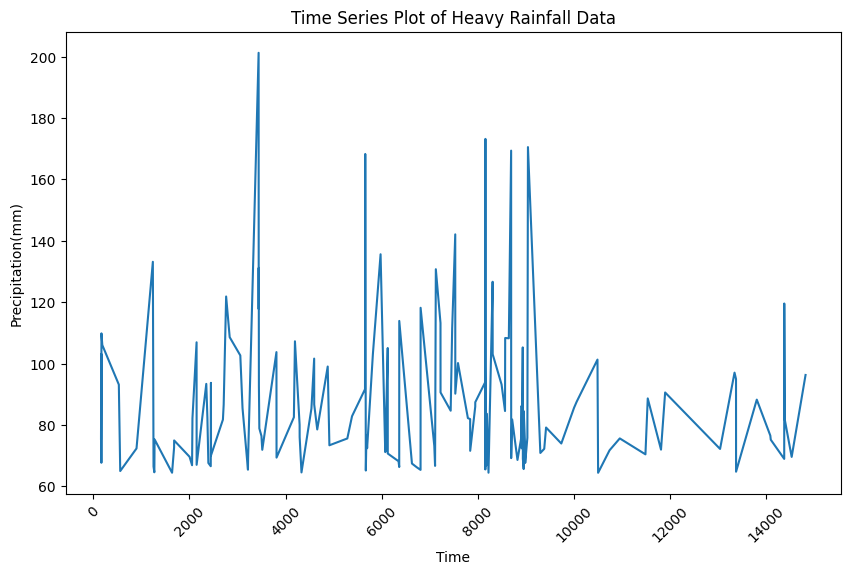

In [ ]:


plt.figure(figsize=(10, 6))
sns.lineplot(data=extreme_series, x=extreme_series.index, y='precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation(mm)')
plt.title('Time Series Plot of Heavy Rainfall Data')
plt.xticks(rotation=45)
plt.show()


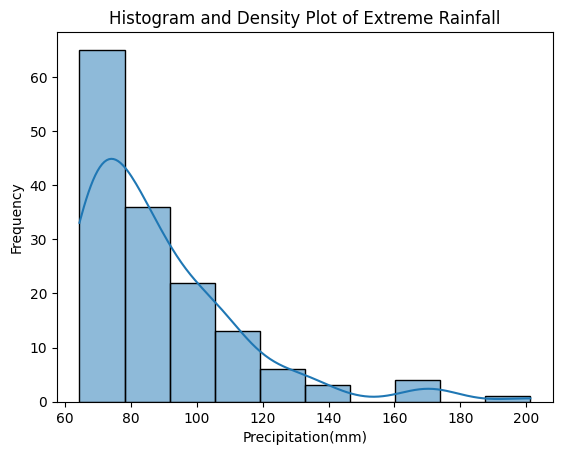

Mean Precipitation: 88.53486666666666 mm
Variance: 596.6888358881431 mm
Standard Deviation: 24.427215066154044
Skewness: 1.889055828366239
Kurtosis: 4.50783192077508
Minimum Precipitation in Extreme series: 64.45 mm
Maximum Precipitation in Extreme Series: 201.23 mm


In [ ]:
# Histogram and density plot
sns.histplot(extreme_series['precipitation'], bins=10, kde=True)
plt.xlabel('Precipitation(mm)')
plt.ylabel('Frequency')
plt.title('Histogram and Density Plot of Extreme Rainfall')
plt.show()

# Calculate statistics
mean = extreme_series['precipitation'].mean()
variance = extreme_series['precipitation'].var()
std_dev = extreme_series['precipitation'].std()
skewness = extreme_series['precipitation'].skew()
kurtosis = extreme_series['precipitation'].kurtosis()
minimum = extreme_series['precipitation'].min()
maximum = extreme_series['precipitation'].max()
print('Mean Precipitation:', mean ,'mm')
print('Variance:', variance, 'mm')
print('Standard Deviation:', std_dev)
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)
print('Minimum Precipitation in Extreme series:', minimum,'mm')
print('Maximum Precipitation in Extreme Series:', maximum,'mm')



In [ ]:
from scipy.stats import kstest

Exponential Model Parameters: (64.45, 24.084866666666656)


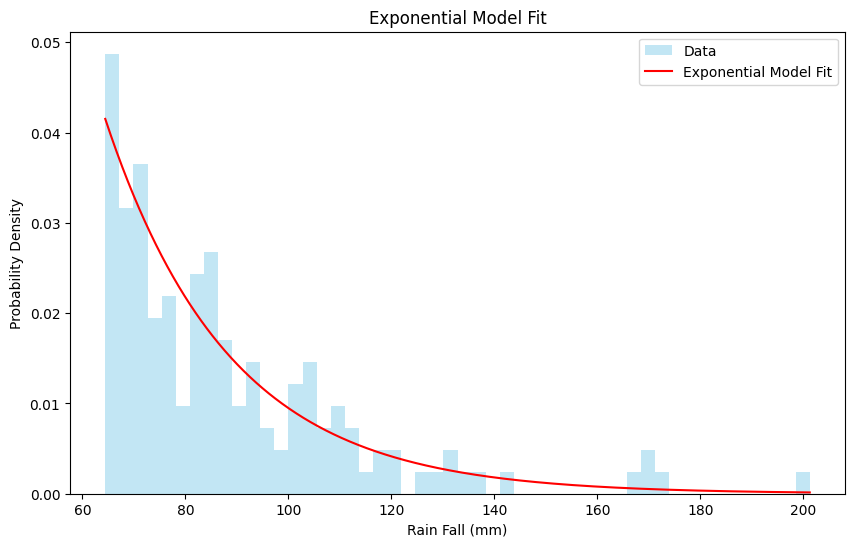

AIC: 1258.48
BIC: 1264.50
KS statistic: 0.05
KS p-value: 0.7804


In [ ]:
params_exp = expon.fit(extreme_series['precipitation'])
print('Exponential Model Parameters:', params_exp )
pdf_exp = expon.pdf(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), *params_exp)

# Calculate AIC and BIC
exp_aic = -2 * expon.logpdf(extreme_series['precipitation'], *params_exp).sum() + 2 * len(params_exp)
n = len(extreme_series['precipitation'])
exp_bic = -2 * expon.logpdf(extreme_series['precipitation'], *params_exp).sum() + len(params_exp) * np.log(n)

ks_statistic, ks_p_value = kstest(extreme_series['precipitation'], 'expon', args=params_exp)
# Plotting the exponential model fit graph
plt.figure(figsize=(10, 6))

plt.hist(extreme_series['precipitation'], bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), pdf_exp, color='red', label='Exponential Model Fit')
plt.title('Exponential Model Fit')
plt.xlabel('Rain Fall (mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()



# Printing AIC, KS statistic, and p-value
print(f"AIC: {exp_aic:.2f}")
print(f"BIC: {exp_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")



Lognormal Model Parameters: (0.9852506318182642, 62.380303553211846, 17.05749664760796)


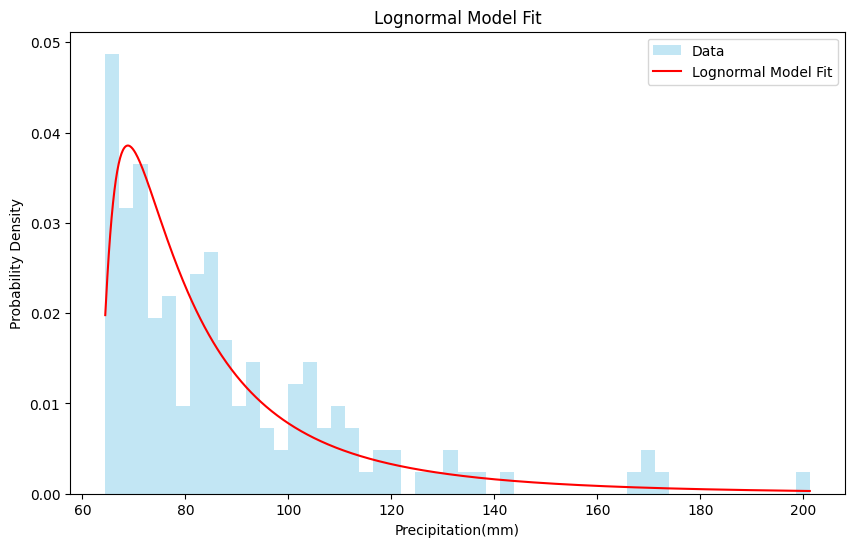

AIC: 1278.20
BIC: 1287.23
KS statistic: 0.09
KS p-value: 0.1521


In [ ]:

# Fitting the data to a lognormal distribution
params_lognorm = lognorm.fit(extreme_series['precipitation'])
print('Lognormal Model Parameters:', params_lognorm)
pdf_lognorm = lognorm.pdf(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), *params_lognorm)

# Calculate AIC and BIC
lognorm_aic = -2 * lognorm.logpdf(extreme_series['precipitation'], *params_lognorm).sum() + 2 * len(params_lognorm)
n = len(extreme_series['precipitation'])
lognorm_bic = -2 * lognorm.logpdf(extreme_series['precipitation'], *params_lognorm).sum() + len(params_lognorm) * np.log(n)
ks_statistic, ks_p_value = kstest(extreme_series['precipitation'], 'lognorm', args=params_lognorm)

# Plotting the lognormal model fit graph
plt.figure(figsize=(10, 6))

plt.hist(extreme_series['precipitation'], bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), pdf_lognorm, color='red', label='Lognormal Model Fit')
plt.title('Lognormal Model Fit')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"AIC: {lognorm_aic:.2f}")
print(f"BIC: {lognorm_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")


Gumbel Model Parameters: (78.61608662543213, 15.214795099707159)


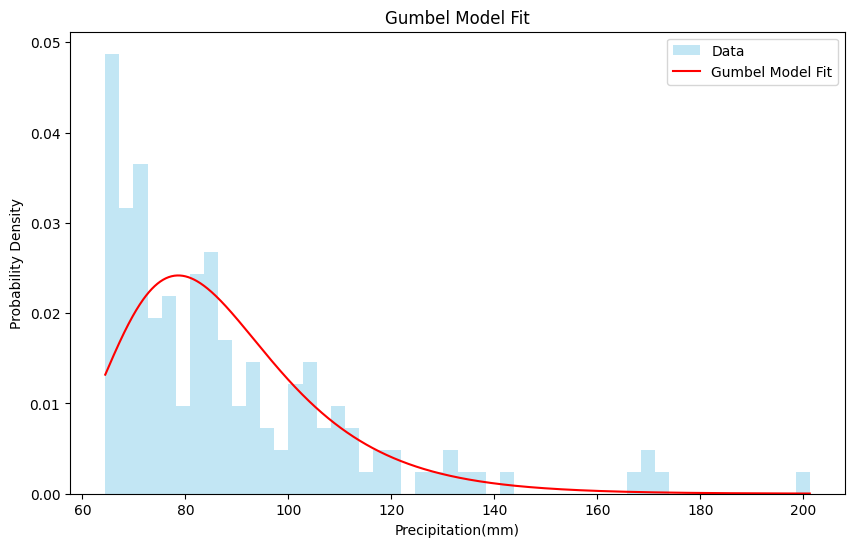

AIC: 1316.26
BIC: 1322.28
KS statistic: 0.11
KS p-value: 0.0366


In [ ]:


# Fitting the data to a gumbel distribution
params_gumbel = gumbel_r.fit(extreme_series['precipitation'])
print('Gumbel Model Parameters:',params_gumbel)
pdf_gumbel = gumbel_r.pdf(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), *params_gumbel)

# Calculate AIC and BIC
gumbel_aic = -2 * gumbel_r.logpdf(extreme_series['precipitation'], *params_gumbel).sum() + 2 * len(params_gumbel)
n = len(extreme_series['precipitation'])
gumbel_bic = -2 * gumbel_r.logpdf(extreme_series['precipitation'], *params_gumbel).sum() + len(params_gumbel) * np.log(n)

ks_statistic, ks_p_value = kstest(extreme_series['precipitation'], 'gumbel_r', args=params_gumbel)

# Plotting the gumbel model fit graph
plt.figure(figsize=(10, 6))

plt.hist(extreme_series['precipitation'], bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), pdf_gumbel, color='red', label='Gumbel Model Fit')
plt.title('Gumbel Model Fit')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"AIC: {gumbel_aic:.2f}")
print(f"BIC: {gumbel_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")



Generalised Pareto Model Parameters: (-0.08575166268730225, 64.44999999995161, 26.311570115786637)


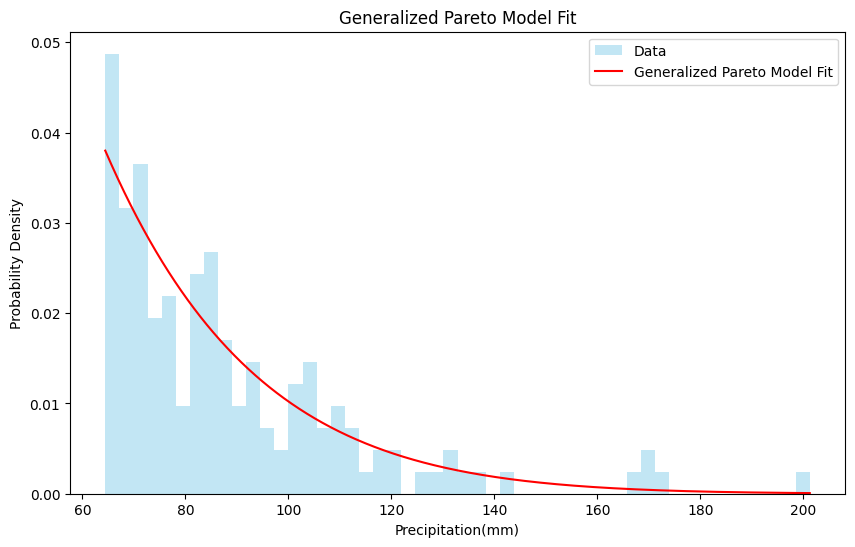

AIC: 1262.03
BIC: 1271.06
KS statistic: 0.06
KS p-value: 0.6324


In [ ]:


# Fitting the data to a generalized pareto distribution
params_genpareto = genpareto.fit(extreme_series['precipitation'])
print('Generalised Pareto Model Parameters:',params_genpareto)
pdf_genpareto = genpareto.pdf(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), *params_genpareto)

# Calculate AIC and BIC
genpareto_aic = -2 * genpareto.logpdf(extreme_series['precipitation'], *params_genpareto).sum() + 2 * len(params_genpareto)
n = len(extreme_series['precipitation'])
genpareto_bic = -2 * genpareto.logpdf(extreme_series['precipitation'], *params_genpareto).sum() + len(params_genpareto) * np.log(n)

ks_statistic, ks_p_value = kstest(extreme_series['precipitation'], 'genpareto', args=params_genpareto)

# Plotting the generalized pareto model fit graph
plt.figure(figsize=(10, 6))

plt.hist(extreme_series['precipitation'], bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), pdf_genpareto, color='red', label='Generalized Pareto Model Fit')
plt.title('Generalized Pareto Model Fit')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"AIC: {genpareto_aic:.2f}")
print(f"BIC: {genpareto_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")


In [ ]:
# finding the annual maxima value for each year

annual_maxima = {}
for year in extreme_series['YEAR'].unique():
  annual_maxima[year] = extreme_series[extreme_series['YEAR'] == year]['precipitation'].max()
  print(annual_maxima[year])


109.86
93.17
72.38
133.17
74.99
106.95
93.75
121.87
102.67
201.23
103.76
107.28
101.64
99.06
82.88
168.28
135.62
113.91
118.19
130.75
142.1
87.45
173.19
169.37
170.52
79.2
73.99
87.6
101.32
75.65
88.67
90.61
72.22
97.07
88.28
76.56
119.58
96.31


GEV Model Parameters: (-0.24775331739738804, 92.66971192177414, 19.769389091033354)


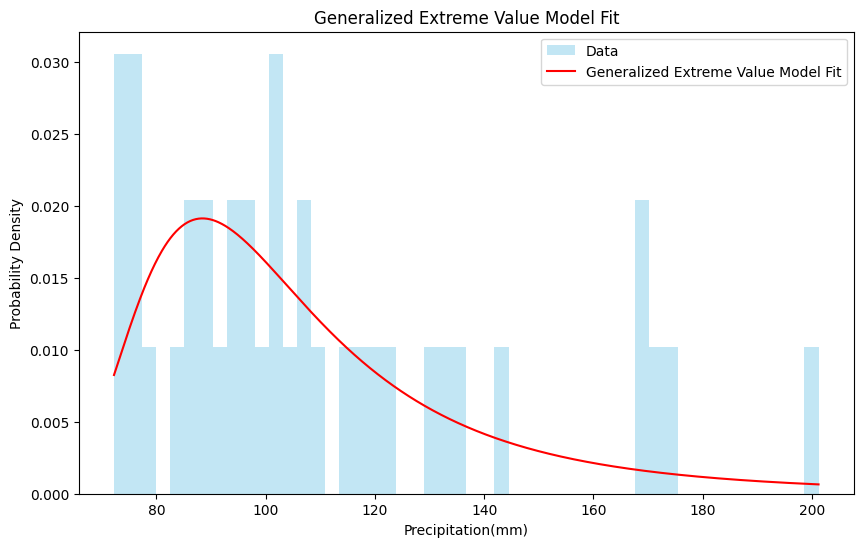

AIC: 363.51
BIC: 368.42
KS statistic: 0.07
KS p-value: 0.9737


In [ ]:
# using these annual maxima value fitting the Generalised Extreme Value Distribution

params_gev = genextreme.fit(list(annual_maxima.values()))
print('GEV Model Parameters:',params_gev)
pdf_gev = genextreme.pdf(np.linspace(min(annual_maxima.values()), max(annual_maxima.values()), 1000), *params_gev)

# Calculate AIC, BIC KS Test
gev_aic = -2 * genextreme.logpdf(list(annual_maxima.values()), *params_gev).sum() + 2 * len(params_gev)
n = len(annual_maxima.values())
gev_bic = -2 * genextreme.logpdf(list(annual_maxima.values()), *params_gev).sum() + len(params_gev) * np.log(n)
ks_statistic, ks_p_value = kstest(list(annual_maxima.values()), 'genextreme', args=params_gev)

# Plotting the generalized extreme value model fit graph
plt.figure(figsize=(10, 6))

plt.hist(list(annual_maxima.values()), bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(min(annual_maxima.values()), max(annual_maxima.values()), 1000), pdf_gev, color='red', label='Generalized Extreme Value Model Fit')
plt.title('Generalized Extreme Value Model Fit')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"AIC: {gev_aic:.2f}")
print(f"BIC: {gev_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")

In [ ]:
#  finding the 100mm return period using gev

# Extract the parameters from the fitted model
shape, scale, location = params_gev

# Calculate the return period for 100 mm precipitation
return_period = 1 / (1 - genextreme.cdf(100, shape, scale, location))

# Print the return period
print(f"Return period for 100 mm precipitation using GEV: {return_period:.2f} years")


Return period for 100 mm precipitation using GEV: 1.98 years


In [ ]:
# Extract the parameters from the fitted model
shape, scale, location = params_gev

# Calculate the return period for 150 mm precipitation
return_period = 1 / (1 - genextreme.cdf(150, shape, scale, location))

# Print the return period
print(f"Return period for 150 mm precipitation using GEV: {return_period:.2f} years")


Return period for 150 mm precipitation using GEV: 9.40 years


In [ ]:
# Extract the parameters from the fitted model
shape, scale, location = params_gev

# Calculate the return period for 200 mm precipitation
return_period = 1 / (1 - genextreme.cdf(200, shape, scale, location))

# Print the return period
print(f"Return period for 200 mm precipitation using GEV: {return_period:.2f} years")


Return period for 200 mm precipitation using GEV: 31.70 years


In [ ]:
# Extract the parameters from the fitted model
shape, scale, location = params_gev

# Calculate the return period for 250 mm precipitation
return_period = 1 / (1 - genextreme.cdf(250, shape, scale, location))

# Print the return period
print(f"Return period for 250 mm precipitation using GEV: {return_period:.2f} years")


Return period for 250 mm precipitation using GEV: 81.63 years


In [ ]:


The seaborn library is used for data visualization.  Specifically, it's used to create:

1.  A line plot of the extreme precipitation time series:  `sns.lineplot(...)`
2.  A histogram and density plot of the extreme precipitation data: `sns.histplot(...)`
